In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [24]:
df = pd.read_csv('data.csv')
df.head()

,Unnamed: 0,X1,X2,Y
0,0,0.004291,-0.174600,-1
1,1,2.225050,0.117181,1
2,2,0.274173,-0.514910,-1
3,3,-1.045133,-0.798009,1
4,4,1.611457,0.239339,1


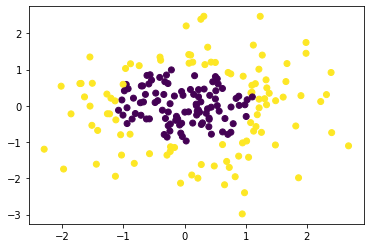

In [25]:
plt.scatter(df.X1, df.X2, c=df.Y)

In [29]:
training_data, testing_data = train_test_split(df, test_size=0.2)
Xtrain = training_data.iloc[:,1:3]
Ytrain = training_data.iloc[:,3:4]
Xtest = testing_data.iloc[:,1:3]
Ytest = testing_data.iloc[:,3:4]

In [149]:
def fit(x, y, t):
    y = np.asarray(y).flatten()
    n_samples, n_features = np.shape(x)
    D = np.full(n_samples, (1 / n_samples))
    f = []
    for i in range(t):
        min_error = float('inf')
        for feature in range(n_features):
            xFeatures = np.asarray(x.iloc[:, feature])
            unique_values = np.unique(xFeatures)
            for threshold1 in unique_values:
                p = 1
                prediction = np.ones(len(y))
                prediction[x.iloc[:, feature] < threshold1] = -1
                error = sum(D[y != prediction])
                if (1 > error > 0.5):
                    error = 1 - error
                    p = -1
                if error < min_error:
                    polarity = p
                    threshold = threshold1
                    index = feature
                    min_error = error
        alpha = 0.5 * np.log((1.0 - min_error) / (min_error + 1e-10))
        predictions = np.ones(len(y))
        if polarity == 1:
            negatives = (x.iloc[:, index] < threshold)
        else:
            negatives = (x.iloc[:, index] > threshold)
        predictions[negatives] = -1
        z = 2 * np.sqrt(min_error * (1-min_error))
        temp = D * np.exp(-alpha * y * predictions)
        D = temp/z
        f.append([alpha, threshold, index, polarity])
    return f
    
def predict(fs, x):
    n_samples = len(x)
    y_pred = np.zeros(len(x))
    for f in fs:
        predictions = np.ones(n_samples)
        if f[3] == 1:
            negatives = (x.iloc[:, f[2]] < f[1])
        else:
            negatives = (x.iloc[:, f[2]] > f[1])
        predictions[negatives] = -1
        np.asarray(predictions)
        y_pred += np.dot(predictions, f[0])
    y_pred = np.sign(y_pred).flatten()
    return y_pred

<div dir="rtl">
برای کلسیفایر ضعیف از کلسیفایری استفاده شده است که برای هر فیچر مقادیر متمایز آنرا به عنوان ترشهلد در نظر میگیرد و در نهایت آن مقداری را انتخاب میکند که کمترین ارور را به ما بدهد. سپس پردیکشن و ارور را بدست میاوریم وبر اساس آنها پارامترهای ادابوست را محاسبه میکنیم.
    </div>

In [153]:
f = fit(Xtrain, Ytrain, 15)
prediction = predict(f, Xtest)

accuracy = 0
Ytest = np.asarray(Ytest)
for i in range(len(Ytest)):
    if Ytest[i] == prediction[i]:
        accuracy += 1

print("Accuracy: " + str(accuracy / len(Ytest)))

Accuracy: 0.95
